In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [42]:
df_duke_dividend=pd.read_csv("DUK_dividend.csv",parse_dates=['Date'],index_col=0)
df_duke_dividend=df_duke_dividend[df_duke_dividend.index>='1/1/2017']
df_nextera_dividend=pd.read_csv("NEE_dividend.csv",parse_dates=['Date'],index_col=0)
df_nextera_dividend=df_nextera_dividend[df_nextera_dividend.index>='1/1/2017']
df_xel_dividend=pd.read_csv("XEL_dividend.csv",parse_dates=['Date'],index_col=0)
df_xel_dividend=df_xel_dividend[df_xel_dividend.index>='1/1/2017']

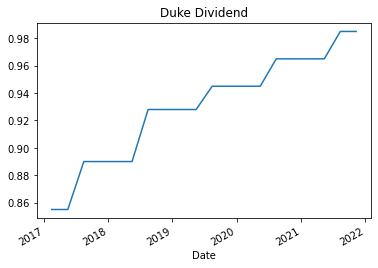

In [43]:
portfolio_returns=df_duke_dividend['Dividends']
portfolio_returns.plot()
plt.title("Duke Dividend")
plt.show()
#covariance = portfolio_returns.cov()*4

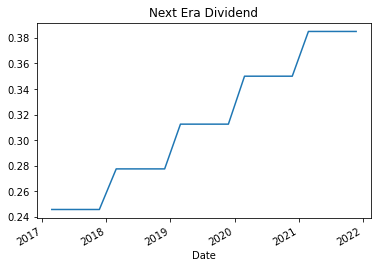

In [44]:
portfolio_returns_nextera=df_nextera_dividend['Dividends']
plt.title("Next Era Dividend")
portfolio_returns_nextera.plot()
plt.show()

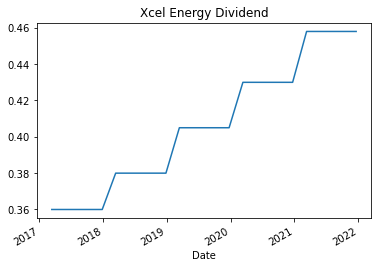

In [45]:
portfolio_returns_xel=df_xel_dividend['Dividends']
plt.title("Xcel Energy Dividend")
portfolio_returns_xel.plot()
plt.show()

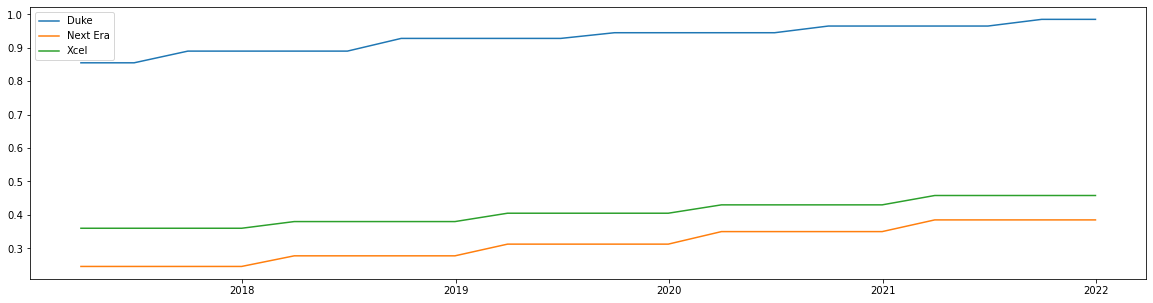

In [46]:
portfolio_returns_duke2=portfolio_returns.resample('Q').sum().reset_index()
portfolio_returns_nee2=portfolio_returns_nextera.resample('Q').sum().reset_index()
portfolio_returns_xel2=portfolio_returns_xel.resample('Q').sum().reset_index()

dfs=[portfolio_returns_duke2,portfolio_returns_nee2,portfolio_returns_xel2]

df_final = functools.reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
df_final.set_index("Date",inplace=True)
df_final=df_final.rename(columns={"Dividends_x":"Dividends_duke","Dividends_y":"Dividends_nee","Dividends": "Dividends_xel"})
#print(df_final)
fig,ax=plt.subplots(figsize=(20,5))
ax.plot(df_final.index,df_final[['Dividends_duke','Dividends_nee','Dividends_xel']],label=['Duke','Next Era','Xcel'])
plt.legend()
plt.show()

#portfolio_returns_combined=pd.merge(portfolio_returns_duke2,portfolio_returns_nee2,suffixes=("_duke", "_nee"),on="Date")
#portfolio_returns_combined=pd.merge(portfolio_returns_duke2,portfolio_returns_xel2,suffixes=("_duke", "_xel"),on="Date")

#fig,ax=plt.subplots(figsize=(20,5))

#ax.plot(portfolio_returns_combined2.index,portfolio_returns_combined2[['Dividends_duke','Dividends_nee']])

#y1=portfolio_returns_combined2['Dividends_duke']
#y2=portfolio_returns_combined2['Dividends_nee']
#y3=portfolio_returns_combined2['Dividends_xel']

#plt.bar(x, y1, color='r')
#plt.bar(x, y2, bottom=y1, color='b')
#plt.bar(x, y3, bottom=y1+y2, color='y')

#plt.stackplot(portfolio_returns_combined.index,portfolio_returns_combined['Dividends_duke'],portfolio_returns_combined['Dividends_nee'],colors=['green','blue'])
#plt.show()




In [47]:
def correlation(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    x_deviation = [i - x_mean for i in x]
    y_deviation = [i - y_mean for i in y]
    xy_deviation = [x_deviation[i] * y_deviation[i] for i in range(n)]
    x_deviation_sqr = [i ** 2 for i in x_deviation]
    y_deviation_sqr = [i ** 2 for i in y_deviation]
    r = sum(xy_deviation) / (sum(x_deviation_sqr) * sum(y_deviation_sqr)) ** 0.5
    return r

#print(portfolio_returns_combined.columns)
print(correlation(df_final['Dividends_duke'],df_final['Dividends_nee']))

0.9201753229714987


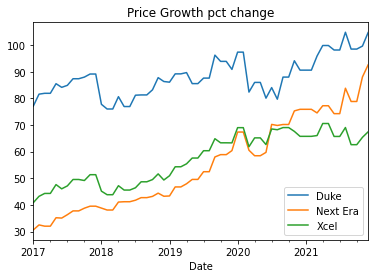

In [48]:
duke_df = pd.read_csv("DUK.csv",parse_dates=['Date'],index_col=0)
duke_df=duke_df[duke_df.index>='1/1/2017']
nee_df =pd.read_csv("NEE.csv",parse_dates=['Date'],index_col=0)
nee_df=nee_df[nee_df.index>='1/1/2017']
xel_df =pd.read_csv("XEL.csv",parse_dates=['Date'],index_col=0)
xel_df=xel_df[xel_df.index>='1/1/2017']

def stock_price_by_pct_chg(df):

    first_price=df['Open'].iloc[0]
    returns=df['Open'].pct_change()
    returns_plus_one = returns.add(1)
    accumulative=returns_plus_one.cumprod()
    accumulative=accumulative.mul(first_price)
    return accumulative


duke_accumulative=stock_price_by_pct_chg(duke_df)
nee_accumulative=stock_price_by_pct_chg(nee_df)
xel_accumulative=stock_price_by_pct_chg(xel_df)


duke_accumulative.asfreq('M').ffill().plot(label='Duke')
nee_accumulative.asfreq('M').ffill().plot(label='Next Era')
xel_accumulative.asfreq('M').ffill().plot(label='Xcel')

plt.title('Price Growth pct change' )
plt.legend()
plt.show()

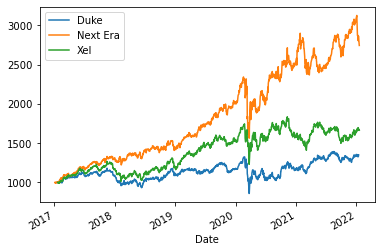

In [49]:
investment=1000

def valuation(df):
    df_returns=df['Open'].pct_change()
    df_returns_plus_one = df_returns.add(1)
    df_cumulative_return = df_returns_plus_one.cumprod()
    return df_cumulative_return.mul(investment)

val=valuation(duke_df)
val.plot(label="Duke")
val=valuation(nee_df)
val.plot(label="Next Era")
val=valuation(xel_df)
val.plot(label="Xel")
plt.legend()
plt.show()

Return on a 1000 shares in accumulative dividends


C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


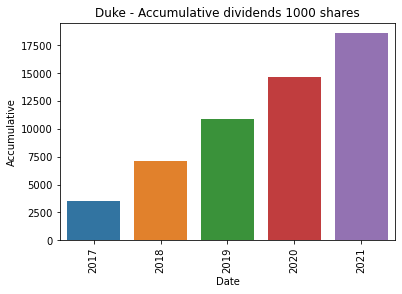

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


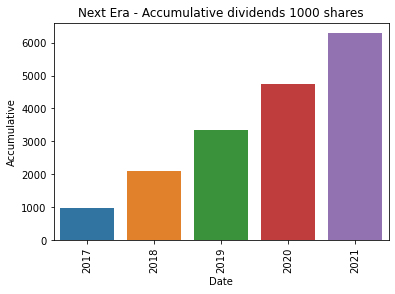

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


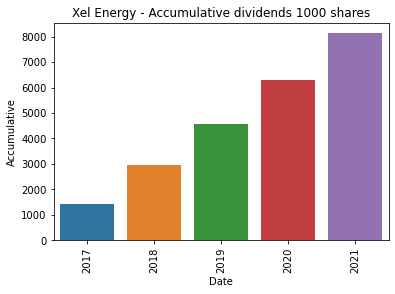

In [50]:
print("Return on a 1000 shares in accumulative dividends")

def AccumulativeEarnings(investment,df,title):
    df['Accum_Earnings']=df['Dividends'].apply(lambda x: x*investment)
    months=df.index.month
    years=df.index.year
    grouped=df.groupby([years,months])['Accum_Earnings'].sum()
    grouped=grouped.unstack()

    fp=df.pivot_table(index=df.index.year,columns=df.index.month,values=['Accum_Earnings'],aggfunc='sum')
    fp['Totals'] = fp.sum(axis='columns')
    fp['Accumulative']=fp['Totals'].cumsum()

    sns.barplot(fp.index,fp['Accumulative'])
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    return fp

investment=1000
title="Duke - Accumulative dividends per stock"
accum_duke_dividend=AccumulativeEarnings(investment,df_duke_dividend,"Duke - Accumulative dividends 1000 shares")
accum_nee_dividend=AccumulativeEarnings(investment,df_nextera_dividend,"Next Era - Accumulative dividends 1000 shares")
accum_xel_dividend=AccumulativeEarnings(investment,df_xel_dividend,"Xel Energy - Accumulative dividends 1000 shares")




In [51]:
investment=1000
earning=float(accum_duke_dividend['Accumulative'].iloc[-1])
cost=duke_df['Open'].iloc[0]*investment
percent=float(earning)/float(cost)*100
print("Duke Cost {cost} Dividend Earning {earning}   {percent}".format(cost=cost,earning=earning,percent=percent))
earning=accum_nee_dividend['Accumulative'].iloc[-1]
cost=nee_df['Open'].iloc[0]*investment
percent=earning/cost*100
print("Next Era Cost {cost} Dividend Earning {earning} {percent}".format(cost=cost,earning=earning,percent=percent))
earning=accum_xel_dividend['Accumulative'].iloc[-1]
cost=xel_df['Open'].iloc[0]*investment
percent=earning/cost*100
print("Xel Cost {cost} Dividend Earning {earning} {percent}".format(cost=cost,earning=earning,percent=percent))

print()

Duke Cost 77470.00099999999 Dividend Earning 18592.0   23.998967032412978
Next Era Cost 29885.0 Dividend Earning 6283.0 21.023925046009705
Xel Cost 41090.0 Dividend Earning 8132.0 19.79070333414456



C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\statsmodel

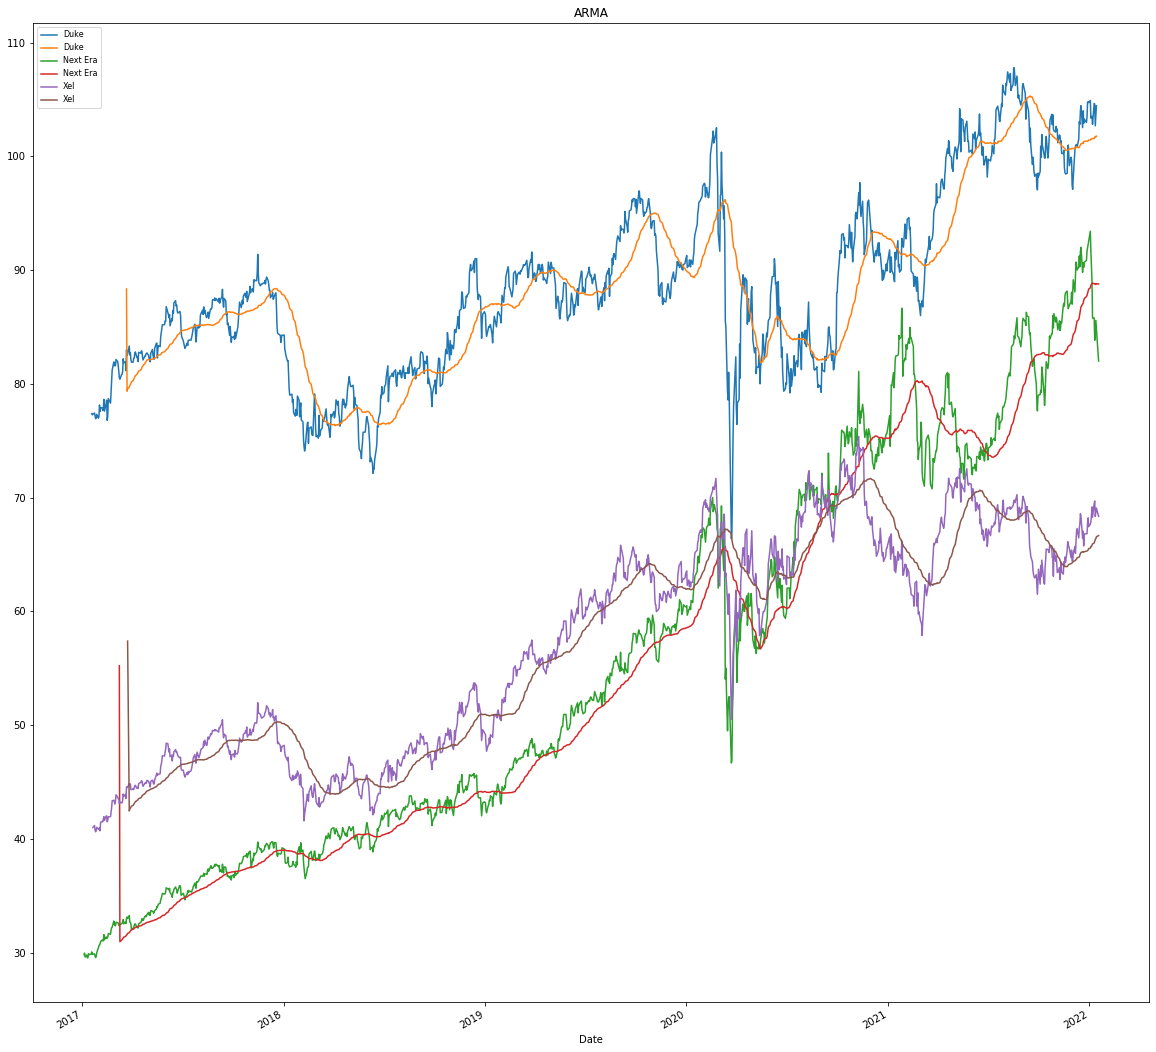

In [84]:
print("Predicted Price pct change")
def plotARMA(df_accumulative,ax,label):
    result=df_accumulative
    result=result.rolling(window=45).mean().dropna()
    mod = sm.tsa.arima.ARIMA(result, order=(2,0,0))
    res = mod.fit()
    # Plot the original series and the forecasted series
    #res.plot_predict(start=0, end=400)
    df_accumulative.plot(ax=ax,label=label)
    res.predict().plot(ax=ax,label=label)

fig,ax = plt.subplots(figsize=(20,20))    
plotARMA(duke_accumulative,ax,"Duke")
plotARMA(nee_accumulative,ax,"Next Era")
plotARMA(xel_accumulative,ax,"Xel")
plt.legend(fontsize=8)
plt.title("ARMA")
plt.show()